Análisis teniendo en cuenta las ventanas

In [1]:
%cd ~/work/nbs_pipeline

/home/macu/work/nbs_pipeline


In [2]:
import pandas as pd
import numpy as np
import ydata_profiling as ydp
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [3]:
file_errors_small  = 'errors_small_03022025_2.csv'
file_results_small = 'results_small_03022025_2.csv'

In [4]:
results_small = pd.read_csv(file_results_small, index_col=None, header=0)
errors_small  = pd.read_csv(file_errors_small, index_col=None, header=0)

In [5]:
print("----- ERRORS -----")
print(f"Total error cases: {len(errors_small)}")
display(errors_small.head())
print(f"Total results: {len(results_small)}")
display(results_small.head())

----- ERRORS -----
Total error cases: 0


,model_size,n_epochs,dataset_percent,maskared_percent,n_windows,windows,error


Total results: 72


,model_size,n_epochs,dataset_percent,maskared_percent,n_windows,time,first_train_loss,first_mse,first_rmse,first_mae,...,last_mae,last_smape,windows,best_epochs,train_losses,eval_pre,eval_post,full_result,first_eval_loss,last_eval_loss
0,small,1,0.25,0.25,1,2.685166,0.004878,0.062864,0.004093,0.034990,...,0.035830,0.220684,[12],[0],[0.004878332000225782],"{'mse': [0.062864269723774], 'rmse': [0.004092...","{'mse': [0.06463234340695001], 'rmse': [0.0042...","([[0.004878332000225782]], {'mse': [0.06286426...",0.003808,0.003987
1,small,1,0.25,0.25,5,12.719703,0.002372,0.064718,0.004559,0.037049,...,0.036754,0.252273,"[8, 10, 12, 16, 17]","[0, -1, -1, -1, -1]",[0.0023718656273558738],"{'mse': [0.05209277707711441, 0.05392793238197...","{'mse': [0.05242671820414231, 0.05301511206828...","([[0.0023718656273558738], [0.0034825043519958...",0.004559,0.004453
2,small,1,0.25,0.50,1,2.527504,0.003440,0.059729,0.003681,0.031573,...,0.031220,0.229842,[12],[0],[0.0034395340248011053],"{'mse': [0.05972937112386405], 'rmse': [0.0036...","{'mse': [0.057081137821482844], 'rmse': [0.003...","([[0.0034395340248011053]], {'mse': [0.0597293...",0.003383,0.003158
3,small,1,0.25,0.50,5,12.502074,0.003997,0.073824,0.006080,0.042059,...,0.042744,0.235062,"[8, 10, 12, 16, 17]","[0, 0, -1, -1, -1]",[0.003997280274052173],"{'mse': [0.04988009707098385, 0.05137204655944...","{'mse': [0.04956533785602418, 0.05125778898978...","([[0.003997280274052173], [0.00375097012729384...",0.006080,0.006408
4,small,1,0.25,0.75,1,2.544674,0.004768,0.060629,0.003816,0.032711,...,0.031725,0.235766,[12],[0],[0.004768008249811828],"{'mse': [0.06062916898599903], 'rmse': [0.0038...","{'mse': [0.056645987247211885], 'rmse': [0.003...","([[0.004768008249811828]], {'mse': [0.06062916...",0.003531,0.003103


In [6]:
eval_pre = results_small["eval_pre"].apply(lambda x: ast.literal_eval(x)['loss'])

In [7]:
eval_post = results_small["eval_post"].apply(lambda x: ast.literal_eval(x)['loss'])

In [8]:
eval_pre[:3]

0                              [0.0038084580381918284]
1    [0.002535228232672024, 0.002902595694952955, 0...
2                              [0.0033832186988244453]
Name: eval_pre, dtype: object

In [9]:
eval_pre[:3]

0                              [0.0038084580381918284]
1    [0.002535228232672024, 0.002902595694952955, 0...
2                              [0.0033832186988244453]
Name: eval_pre, dtype: object

In [10]:
def improvement_percentage(pre, post):
    return [(p - pre_val)*100 / pre_val if pre_val != 0 else np.nan for pre_val, p in zip(pre, post)]

In [11]:
improvements = [improvement_percentage(pre, post) for pre, post in zip(eval_pre, eval_post)]

In [12]:
mean_improvements = [np.nanmean(np.array(x)) for x in improvements]

In [13]:
mean_improvements

[4.6868275823675685,
 -1.340815731186004,
 -6.661051625900004,
 -1.2856833867267887,
 -12.117737433897954,
 1.7753083016781037,
 -5.484840060164102,
 -1.1219005894136,
 7.139453961638435,
 -0.30045432436391534,
 -14.794064202922131,
 1.0258014241487143,
 3.9179054888292795,
 -0.3055554481940174,
 -1.7311577171541748,
 4.313924673087583,
 -18.49019214471472,
 1.1144660443748922,
 -1.982452892127688,
 0.9446348633117925,
 -11.168701730503361,
 -3.6399544116467175,
 12.691774873578897,
 8.244470240173952,
 -0.4127979431362134,
 -0.7519367696939797,
 3.6799433624875926,
 -4.637895478629819,
 1.2733007888988077,
 0.9294476143445298,
 -7.177177775459627,
 -1.2792376662403095,
 1.0117506067416027,
 1.5548487963494766,
 -18.683784470011535,
 -0.2541340628176805,
 11.382210553791845,
 -0.38351361980995746,
 14.025961617680839,
 -3.2116890167161074,
 17.07064445046178,
 -5.720634856627341,
 5.755372395090991,
 0.5147386801412142,
 -3.714336205218074,
 0.710577633500741,
 -2.1258653199341135,
 0.

In [14]:
from copy import deepcopy

In [15]:
profile_small_df = results_small[[
    "time", 
    "n_epochs", 
    "dataset_percent", 
    "maskared_percent", 
    "n_windows", 
]].copy()
profile_small_df["improvement"] = deepcopy(mean_improvements)

In [16]:
def get_pos(x, pos, pos2 = None): 
    try:
        return x[pos][pos2]
    except:
        try:
            return x[pos]
        except:
            return x

In [17]:
results_small["last_best_epoch"] = results_small["best_epochs"].apply(
    lambda x: get_pos(ast.literal_eval(x),-1)
)
results_small["last_best_epoch"][:3]

0    0
1   -1
2    0
Name: last_best_epoch, dtype: int64

In [18]:
display(profile_small_df.sort_values('improvement', ascending = False)[:5])

,time,n_epochs,dataset_percent,maskared_percent,n_windows,improvement
64,72.982917,10,0.75,0.75,1,28.065384
40,36.317940,5,0.75,0.75,1,17.070644
38,36.450148,5,0.75,0.50,1,14.025962
52,24.334012,10,0.25,0.75,1,13.756207
22,9.516508,1,1.00,0.75,1,12.691775


In [19]:
display(profile_small_df[profile_small_df["time"] < 8].sort_values('improvement', ascending = False)[:5])

,time,n_epochs,dataset_percent,maskared_percent,n_windows,improvement
8,5.046653,1,0.50,0.50,1,7.139454
0,2.685166,1,0.25,0.25,1,4.686828
12,7.276944,1,0.75,0.25,1,3.917905
14,7.363269,1,0.75,0.50,1,-1.731158
6,4.927399,1,0.50,0.25,1,-5.484840


<Axes: >

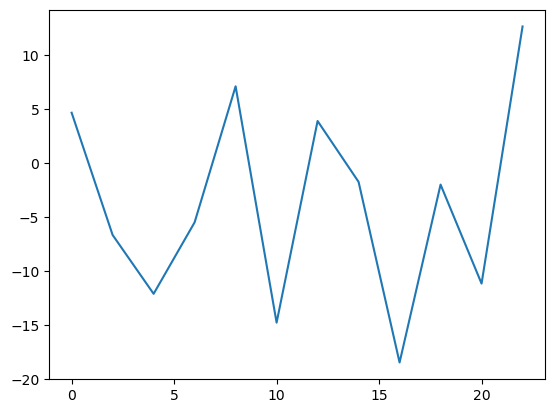

In [20]:
profile_small_df[profile_small_df["time"] < 10]["improvement"].plot()

In [21]:
print("--------------------- Train -----------------")
# Filtrar los 5 mejores loss_percents
display(profile_small_df.sort_values('improvement', ascending = False)[:5])
# Filtrar los 5 mejores loss_percent con dataset percent <= 0.25
display(profile_small_df[profile_small_df['dataset_percent'] < 0.50].sort_values('improvement', ascending = False)[:5])

--------------------- Train -----------------


,time,n_epochs,dataset_percent,maskared_percent,n_windows,improvement
64,72.982917,10,0.75,0.75,1,28.065384
40,36.317940,5,0.75,0.75,1,17.070644
38,36.450148,5,0.75,0.50,1,14.025962
52,24.334012,10,0.25,0.75,1,13.756207
22,9.516508,1,1.00,0.75,1,12.691775


,time,n_epochs,dataset_percent,maskared_percent,n_windows,improvement
52,24.334012,10,0.25,0.75,1,13.756207
0,2.685166,1,0.25,0.25,1,4.686828
26,12.242526,5,0.25,0.50,1,3.679943
48,24.182229,10,0.25,0.25,1,2.831070
5,12.750459,1,0.25,0.75,5,1.775308


In [22]:
def plot_correlation(profile, figsize=(8, 6)):
    correlation_matrix = profile.corr()
    # Crear el heatmap con seaborn
    plt.figure(figsize = figsize)  # Ajusta el tamaño si es necesario
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
    plt.title("Correlation Matrix")
    plt.show()

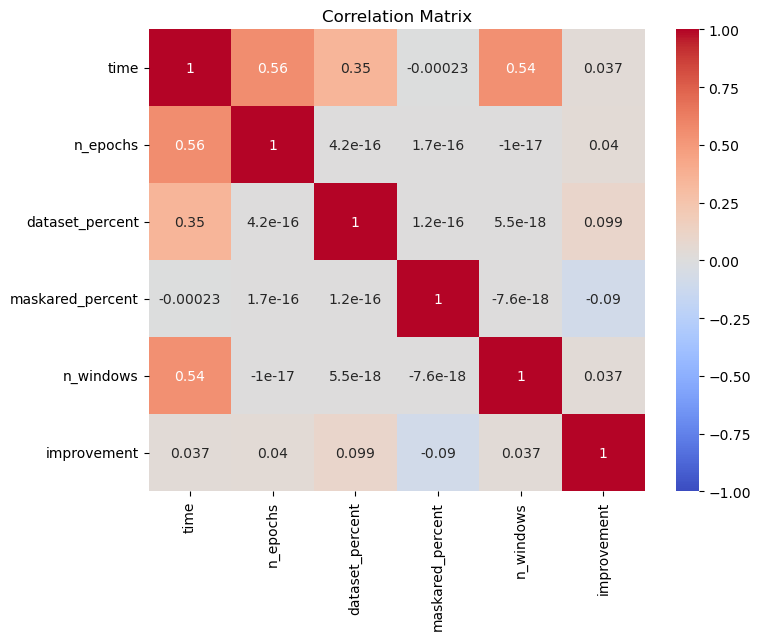

In [23]:
profile_small = ydp.ProfileReport(profile_small_df, title="Pandas Profiling Report for 'df_loss_small'", explorative=True)
plot_correlation(profile_small_df)

Dados los resultados creo que lo que más sentido tiene es hacer la tabla
- 0.25 dataset